# Notebook 2: Understanding the plotly figure object

## Introduction

In this notebook we dissect the plotly figure object, which holds all of the information required for our chart. We will cover the structure of the object, how to navigate the object and how to add / edit properties of a chart to get it looking how you want!

## The notebook set up

We must remember to set up our notebook by importing the required libraries and the ploty.express theme template.

In [1]:
import plotly.express as px
import nisr_style

# import pandas for data manipulation
import pandas as pd

## The data

For this notebook we will be using the `cars` data set we used in the first notebook.

In [2]:
# we read in the cars dataset and hold it in the object "data"
data = pd.read_excel(r'data/cars.xlsx') 
data.head(5) # display the first 5 rows of "data"

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

## The chart

Now we have the data lets produce the scatter chart that we saw in the introduction notebook. 

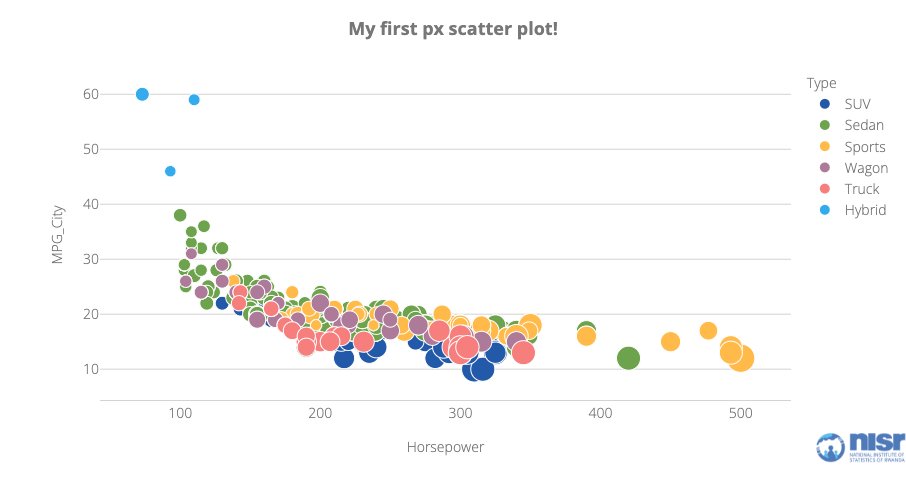

In [3]:
scatter = px.scatter(data, 
                     x = 'Horsepower',
                     y = 'MPG_City',
                     opacity = 1,
                     color = 'Type', # color by 'Type', also creates a legend
                     size = 'EngineSize', # size points by 'EngineSize'
                     title = '<b>My first px scatter plot!</b>', # Add a title! (<b> tags make title bold)
                    )
scatter

Now we have produced a chart, we can start to dig into its structure

## The figure (chart) object

We can view the figure object by printing the figure representation.

In [15]:
print('Scatter chart is object of ', type(scatter))

Scatter chart is object of  <class 'plotly.graph_objs._figure.Figure'>


In [16]:
print(scatter)

Figure({
    'data': [{'hovertemplate': 'SUV<br>Horsepower=%{x}<br>MPG_City=%{y}<br>EngineSize=%{marker.size}',
              'legendgroup': 'SUV',
              'marker': {'color': '#2259A9',
                         'opacity': 1,
                         'size': array([3.5, 3. , 4.4, 4.2, 3.4, 5.3, 4.6, 5.3, 5.3, 4.2, 2.5, 4.7, 6.8, 4.6,
                                        4. , 3. , 4.2, 4.8, 6. , 3.5, 2.4, 2.4, 6. , 2.7, 4.2, 3.2, 4. , 2.4,
                                        4. , 3.5, 4.4, 4.6, 2.5, 4.7, 4.7, 3.3, 5.4, 4.6, 2. , 5. , 5. , 4. ,
                                        3.8, 3.8, 2.4, 5.6, 3.5, 3.3, 3.4, 4.5, 2.2, 2.7, 2.5, 4.7, 4. , 3.3,
                                        4.7, 2.4, 3.2, 2.9]),
                         'sizemode': 'area',
                         'sizeref': 0.02075,
                         'symbol': 'cross'},
              'meta': [SUV],
              'mode': 'markers',
              'name': 'SUV',
              'orientation': 'v',
      

We can see the the `scatter` chart is an `ExpressFigure` object (which makes sense as it was created using plotly.express)

All plotly figure objects consist of two main components (attributes):
1.  `data`: This holds the `traces` (series) for the chart which include the x and y coordinates (for Cartesian plots), marker and line styles, text labels, information on what should appear when we hover over the trace with the mouse etc.  
2. `layout`: This holds the atributes of the axes, figure annotations, legend formatting and other attributes that apply to the figure not held in the `data` structure.
    
### The `data` attribute

Each of these components are attributes of the `ExpressFigure` object and as such can be accessed using `.` notation.
For example to access the `data` attribute of the `scatter` object we can run:

In [18]:
scatter.data

(Scatter({
     'hovertemplate': 'SUV<br>Horsepower=%{x}<br>MPG_City=%{y}<br>EngineSize=%{marker.size}',
     'legendgroup': 'SUV',
     'marker': {'color': '#2259A9',
                'opacity': 1,
                'size': array([3.5, 3. , 4.4, 4.2, 3.4, 5.3, 4.6, 5.3, 5.3, 4.2, 2.5, 4.7, 6.8, 4.6,
                               4. , 3. , 4.2, 4.8, 6. , 3.5, 2.4, 2.4, 6. , 2.7, 4.2, 3.2, 4. , 2.4,
                               4. , 3.5, 4.4, 4.6, 2.5, 4.7, 4.7, 3.3, 5.4, 4.6, 2. , 5. , 5. , 4. ,
                               3.8, 3.8, 2.4, 5.6, 3.5, 3.3, 3.4, 4.5, 2.2, 2.7, 2.5, 4.7, 4. , 3.3,
                               4.7, 2.4, 3.2, 2.9]),
                'sizemode': 'area',
                'sizeref': 0.02075,
                'symbol': 'cross'},
     'meta': [SUV],
     'mode': 'markers',
     'name': 'SUV',
     'orientation': 'v',
     'showlegend': True,
     'x': array([265, 225, 325, 275, 185, 295, 320, 295, 295, 275, 165, 230, 310, 232,
                 210, 201, 275, 285,

You can see the `data` attribute has repeating units of `Scatter`....let's wee what type of object `data` is...

In [19]:
print('scatter.data is a ', type(scatter.data))

scatter.data is a  <class 'tuple'>


A tuple is essentially a list of items (Python does have a seperate object type of `list` but you can go away and read about that....).

As it is a list of items, we can look at each of those items individually using the `index` of the item, starting from 0. For example, to access the first item in the `scatter.data` tuple we would run:

In [20]:
print(f'The first items in the scatter.data tuple is an object of type {type(scatter.data[0])}')
scatter.data[0]

The first items in the scatter.data tuple is an object of type <class 'plotly.graph_objs._scatter.Scatter'>


Scatter({
    'hovertemplate': 'SUV<br>Horsepower=%{x}<br>MPG_City=%{y}<br>EngineSize=%{marker.size}',
    'legendgroup': 'SUV',
    'marker': {'color': '#2259A9',
               'opacity': 1,
               'size': array([3.5, 3. , 4.4, 4.2, 3.4, 5.3, 4.6, 5.3, 5.3, 4.2, 2.5, 4.7, 6.8, 4.6,
                              4. , 3. , 4.2, 4.8, 6. , 3.5, 2.4, 2.4, 6. , 2.7, 4.2, 3.2, 4. , 2.4,
                              4. , 3.5, 4.4, 4.6, 2.5, 4.7, 4.7, 3.3, 5.4, 4.6, 2. , 5. , 5. , 4. ,
                              3.8, 3.8, 2.4, 5.6, 3.5, 3.3, 3.4, 4.5, 2.2, 2.7, 2.5, 4.7, 4. , 3.3,
                              4.7, 2.4, 3.2, 2.9]),
               'sizemode': 'area',
               'sizeref': 0.02075,
               'symbol': 'cross'},
    'meta': [SUV],
    'mode': 'markers',
    'name': 'SUV',
    'orientation': 'v',
    'showlegend': True,
    'x': array([265, 225, 325, 275, 185, 295, 320, 295, 295, 275, 165, 230, 310, 232,
                210, 201, 275, 285, 325, 240, 160, 160,

We can see that `scatter.data` is just a list of all the traces (series) in the scatter plot! 

Let's have a look at some attributes of the first item (trace) in `data` attribute using the `.` notation again:

In [21]:
print(f"Name of trace: '{scatter.data[0].name}'\n") # name of trace as shown in legend

print(f"Style (mode) of trace: '{scatter.data[0].mode}'\n") # style of scatter trace

print(f"Info shown on hovering over trace: '{scatter.data[0].hovertemplate}'\n") # info shown on hover with cursor

print(f"x values of trace:\n {scatter.data[0].x}\n") # x values

print(f"y values of trace:\n {scatter.data[0].y}\n") # y values

print(f"Size of markers in trace:\n {scatter.data[0].marker.size}\n") # size of markers

print(f"Color of markers in trace:\n '{scatter.data[0].marker.color}'\n") # color of markers


Name of trace: 'SUV'

Style (mode) of trace: 'markers'

Info shown on hovering over trace: 'SUV<br>Horsepower=%{x}<br>MPG_City=%{y}<br>EngineSize=%{marker.size}'

x values of trace:
 [265 225 325 275 185 295 320 295 295 275 165 230 310 232 210 201 275 285
 325 240 160 160 316 173 275 193 195 150 190 192 282 217 174 235 235 230
 300 302 130 292 288 210 215 215 160 305 240 180 185 340 143 185 165 240
 245 230 325 161 220 268]

y values of trace:
 [17 16 16 15 19 14 16 14 14 16 19 15 10 15 15 18 15 16 13 17 21 21 10 20
 15 17 16 20 16 16 12 12 18 15 13 18 13 13 22 13 14 16 17 15 21 13 16 17
 19 14 21 18 19 14 18 18 13 22 15 15]

Size of markers in trace:
 [3.5 3.  4.4 4.2 3.4 5.3 4.6 5.3 5.3 4.2 2.5 4.7 6.8 4.6 4.  3.  4.2 4.8
 6.  3.5 2.4 2.4 6.  2.7 4.2 3.2 4.  2.4 4.  3.5 4.4 4.6 2.5 4.7 4.7 3.3
 5.4 4.6 2.  5.  5.  4.  3.8 3.8 2.4 5.6 3.5 3.3 3.4 4.5 2.2 2.7 2.5 4.7
 4.  3.3 4.7 2.4 3.2 2.9]

Color of markers in trace:
 '#2259A9'



You should be able to see from above how to access different properties of the traces within the `scatter.data` object. 

As well as viewing the values of the attributes, we can use the same methodology to change the values associated with the attributes. Let's look at our `scatter` figure again:

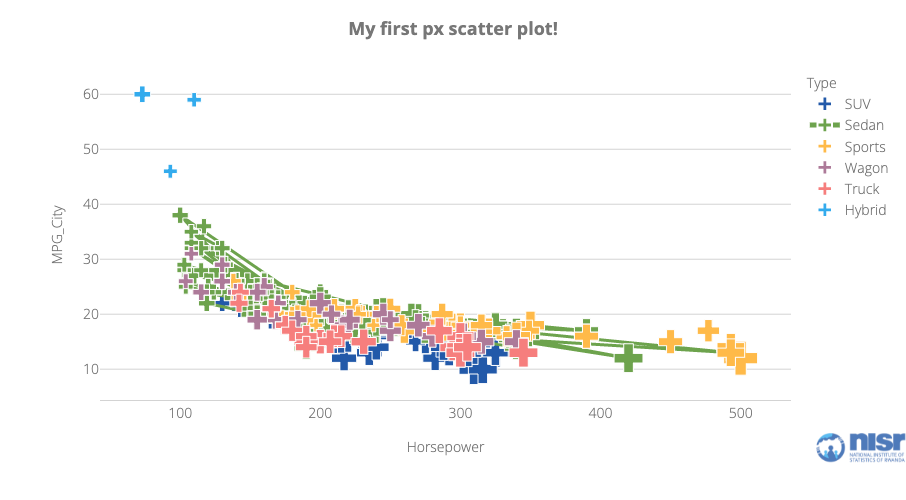

In [22]:
scatter

Let's say we want to change join all the markers with lines for our second trace (`Sedan`), we need to change the `mode` attribute of the trace from `marker` to `lines+markers`. Let's also change the `symbol` of the marker from `circle` to `square`:

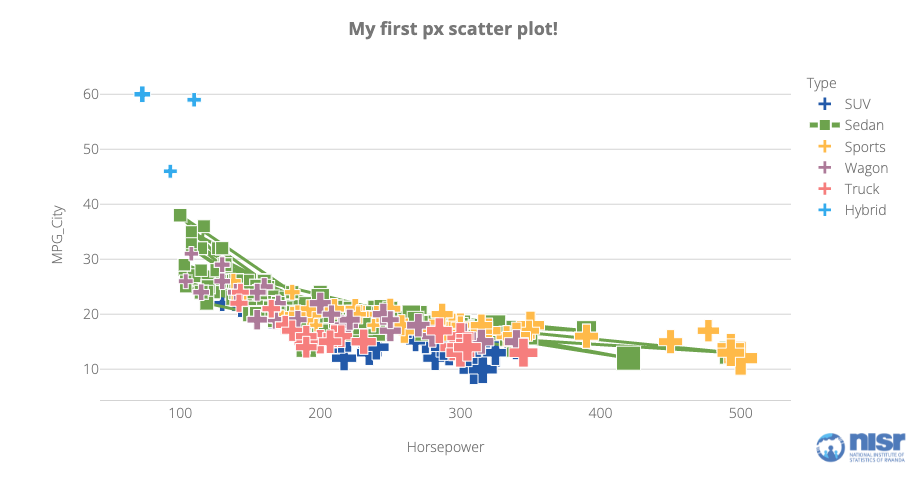

In [23]:
scatter.data[1].marker.symbol = 'square'
scatter.data[1].mode = 'lines+markers'
scatter

Now that does look rubbish, but shows just how easy it is to customise the appearance of each trace individually.

What if we want to apply the same change to all traces in the `data` of the `scatter` figure?

There are two ways to do this. The first is to apply the change to all traces using a loop to cycle through all the traces in the `data` tuple and apply the change, the second is to use the `update_traces()` method. 

Below we use the loop method to change the `name` attributes of the traces to remove the `Type=` prefix (which will also update the text in the legend) and we use the `update_traces()` method to change the `marker_symbol` (equivalent of `marker.symbol`) of all traces to `cross`.

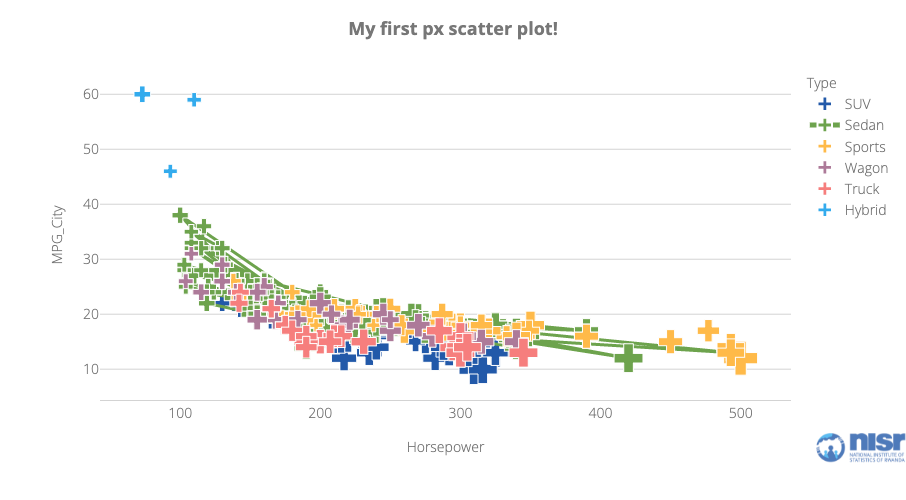

In [24]:
# loop over all traces to change the symbols
for trace in scatter.data:
    trace.name = str.replace(trace.name, 'Type=', '') # takes the trace name and replaces 'Type=' with '' for all traces, in latest version of plotly 'Type=' not included
    
# use the update_traces methods
scatter.update_traces(marker_symbol = 'cross')
scatter

One useful attribute of traces is the information that's displayed when you hover over the data with you mouse cursor. Figures produced using `plotly.express` automatically have attached to each trace and attribute names `hovertemplate`, which specifies what should be included in the `hoverlabel` for that trace. 

Let's have a look at the `hovertemplate` for the traces in the `scatter` figure (these are the same for all traces at the moment as we haven't changed them in any way, you can check by changing the index in `[]` below)

In [25]:
scatter.data[0].hovertemplate

'SUV<br>Horsepower=%{x}<br>MPG_City=%{y}<br>EngineSize=%{marker.size}'

We see that this is a string (in quotes) with some interesting content. There's plain text, some HTML tage in there (`<br>`) and some attributes of the trace in curly brackets after a % (e.g. `%{x}`). This allows us to include certain attributes of the trace in the hover label as well as HTML formatted (using certain formats) text! Full guidance can be found at https://plotly.com/python/reference/#scatter-hovertemplate .

let's try and customise the `hovertemplate`s for the traces in `scatter`.

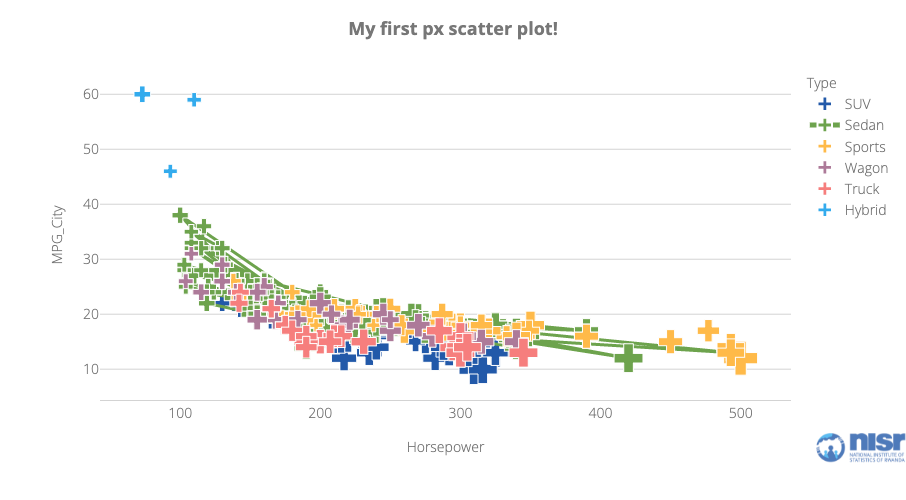

In [26]:
# we create a list of different hovertemplates to see their effect
# there are 6 traces so we need 6 templates
templates = ['SUV<br>Horsepower=%{x}<br>MPG_City=%{y}<br>EngineSize=%{marker.size}',
            'Sedan %{meta[0]}<br>Horsepower: %{x}<br>MPG (City): %{y}<br>Engine size (litres): %{marker.size}',
            'Sports<br>Horsepower: <b>%{x}</b><br><br>MPG (City): <b>%{y}</b><br><br>Engine size (litres): <b>%{marker.size}</b>',
            "<i>Wagon</i><br>Horsepower: <b>%{x}</b><br>MPG (City): <b>%{y}</b><br>Engine size (litres): <b>%{marker.size}</b>",
            'SOMTHING RANDOM',
            '<img src = "screenshots\smily.png" />' # this doesn't work! only certain HTML is allowed
            ]

for i in range(len(scatter.data)):
    scatter.data[i].hovertemplate = templates[i]
    scatter.data[i].meta = [scatter.data[i].name] # this can be used to add other attirbutes to the trae which are accessible to hovertemplate
    
scatter

We now know how to edit the attributes of the data tuple items after we have created a figure using `plotly.express`!

The full reference documentation can be found at https://plotly.com/python/reference/#scatter. 

### The `layout` attribute

Let's have a look at the `layout` attribute for our figure `scatter`:

In [27]:
print(f'Figure layout is object of type {type(scatter.layout)}')
scatter.layout

Figure layout is object of type <class 'plotly.graph_objs._layout.Layout'>


Layout({
    'annotations': [{'align': 'center',
                     'bgcolor': '#ff7f0e',
                     'height': 40,
                     'opacity': 0,
                     'showarrow': False,
                     'text': "<a href='https://statistics.gov.rw'>███████████<br>███████████</a>",
                     'width': 95,
                     'x': 1.17,
                     'xanchor': 'right',
                     'xref': 'paper',
                     'y': -0.08,
                     'yanchor': 'top',
                     'yref': 'paper'}],
    'height': 500,
    'images': [{'layer': 'above',
                'opacity': 0.8,
                'sizex': 0.5,
                'sizey': 0.12,
                'sizing': 'contain',
                'source': ('data:image/png;base64, iVBORw0' ... '8Pf5OW0S0QtG4AAAAASUVORK5CYII='),
                'x': 1.17,
                'xanchor': 'right',
                'xref': 'paper',
                'y': -0.08,
                'yanchor': 'top',
 

We see that the layout is not a `tuple` like the `data` attribute was. We can access teke `layout` attributes jsut as we did for specific `data` tuple items. 

In [28]:
print(f"height of figure: {scatter.layout.height} px \n") # heihgt of figure in pixels

print(f"Title of figure: '{scatter.layout.title.text}'\n") # title of figure

print(f"Title on x axis: '{scatter.layout.xaxis.title.text}'\n") # x-axis label

print(f"Title on y axis: '{scatter.layout.yaxis.title.text}'\n") # y-axis label

print(f"Title on y axis:\n{scatter.layout.template}\n") # The template!

height of figure: 500 px 

Title of figure: '<span style="font-weight:200; font-spacing:-1px;"><b>My first px scatter plot!</b></span>'

Title on x axis: '<span style="font-weight:200; font-spacing:-1px;">Horsepower</span>'

Title on y axis: '<span style="font-weight:200; font-spacing:-1px;">MPG_City</span>'

Title on y axis:
layout.Template({
    'data': {'bar': [{'hoverinfo': 'name+y', 'marker': {'color': '#2259A9', 'line': {'color': '#2259A9'}}, 'type': 'bar'},
                     {'hoverinfo': 'name+y', 'marker': {'color': '#6DA34D', 'line': {'color': '#6DA34D'}}, 'type': 'bar'},
                     {'hoverinfo': 'name+y', 'marker': {'color': '#FFBA49', 'line': {'color': '#FFBA49'}}, 'type': 'bar'},
                     {'hoverinfo': 'name+y', 'marker': {'color': '#AD7A99', 'line': {'color': '#AD7A99'}}, 'type': 'bar'},
                     {'hoverinfo': 'name+y', 'marker': {'color': '#F67E7D', 'line': {'color': '#F67E7D'}}, 'type': 'bar'},
                     {'hoverinfo': 'nam

One of the attributes of `layout` is the template we told plotly to use at the start of this notebook. The template itself has `data` and `layout` attributes which the figure will default to unless the same properties are also declared in the main `data` or `layout` attributes of the figure.

Let's change some layout properties. This can be done either by accessing each property directly with the `.` notation or by calling the `update_layout()` method on `scatter`.

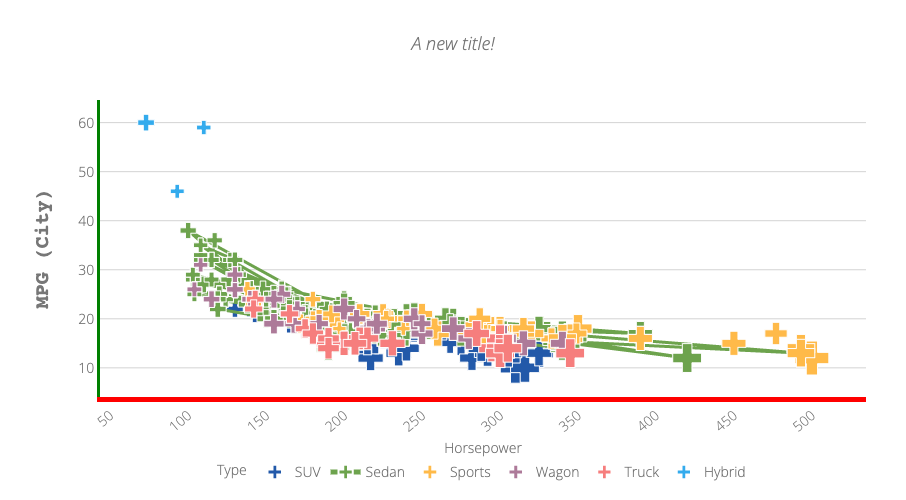

In [29]:
scatter.layout.legend.orientation = 'h'
scatter.layout.legend.x = 0.5
scatter.layout.legend.xanchor = 'center' 
scatter.layout.legend.y = -0.2
scatter.layout.xaxis.linewidth = 5
scatter.layout.xaxis.linecolor= 'red'

# or we can use the update_layout() method, in this the . above is replaced by a _ to access nested attributes
scatter.update_layout(yaxis_showline= True,
                      yaxis_linewidth = 3, 
                      yaxis_linecolor = 'green',
                      yaxis_title_text = '<b>MPG (City)</b>',
                      yaxis_title_font_size = 20,
                      yaxis_title_font_family = 'Courier',
                      title_text = '<i>A new title!</i>',
                      xaxis_tickangle = -40,
                      width = 600,
                      margin_t = 100,
                      autosize=False # halts reactive sizing to full view width
                     )
scatter

You should now be able to dig into the plotly figure object and change the attributes for "fine-tuning" your plot!

Full `layout` attributes list can be found at https://plotly.com/python/reference/#layout.

### Annotations and shapes

We show here two useful properties that can be added to a chart. We can add `annotation` to add labels to the chart wherever we like and `shapes` can be used to shade regions / highlight certain parts of the data.

#### Annotations

To add annotations (including arrows) to a figure, you need to add an `annotations` list populated dictionaries holding the details of each individual annotation to the `layout` of the figure. An example of this is given below

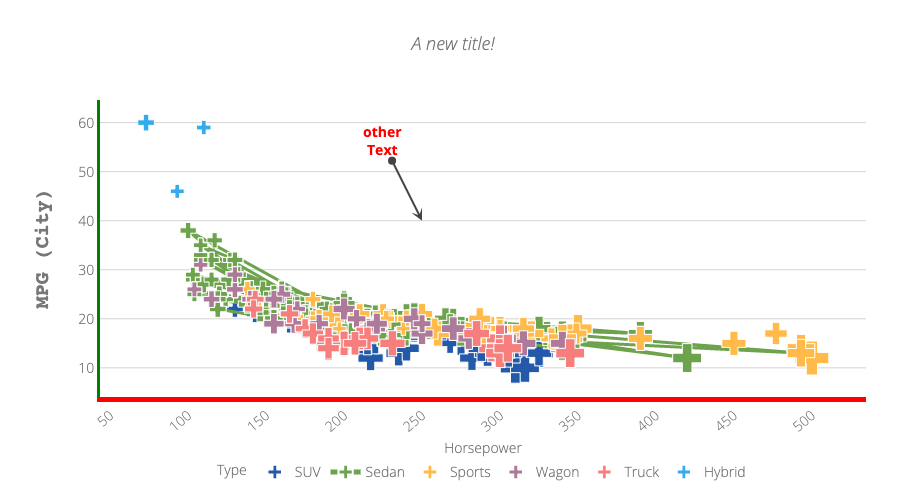

In [30]:
annotations=[
        dict(
            x=300, # x coordinate of annotation / END of arrow
            y=30, # y coordinate of annotation / END of arrow
            xref="x", # use the x and y axis to position annotaation (can also use "paper" to place outside axes)
            yref="y",
            text="dict Text", # text to show
            showarrow=True, # show arrow
            arrowhead=4, # style of arrow end
            startarrowhead = 1, # style of arrow start
            arrowside = "end+start", # show both start and end arrow heads
            ax=-20,
            ay=-80
        ),
        dict(
            x=250,
            y=40,
            xref="x",
            yref="y",
            text="<b>other<br>Text</b>",
            font = dict(color = 'red'),
            showarrow=True,
            arrowhead=3,
            startarrowhead = 6,
            arrowside = "end+start",
            ax=-40,
            ay=-80
        )
]
    

scatter.update_layout(annotations = annotations)
scatter

We can also add an annotation using the `add_annotation()` method....

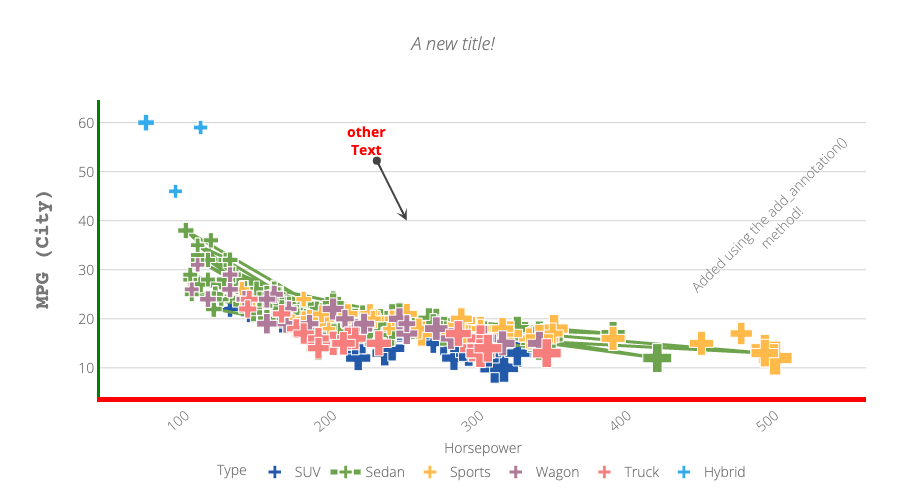

In [31]:
scatter.add_annotation(x = 500, 
                       y = 40, 
                       text = 'Added using the add_annotation()<br>method!',
                      showarrow = False,
                      textangle = -45)

#### Shapes

To add shapes to a figure, you need to add a `shapes` list populated with a dictionary holding the details of each individual shape to the `layout` of the figure. An example of this is given below....

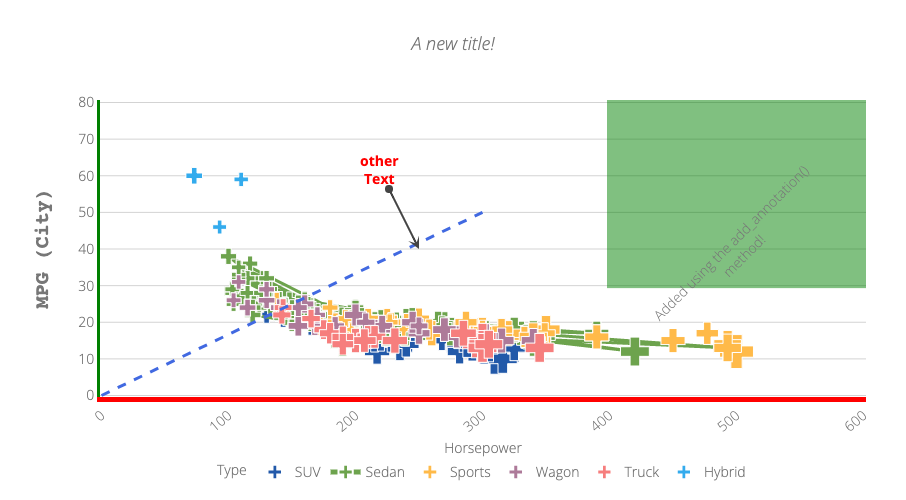

In [32]:
shapes=[
        dict(
            type="line",
            x0=0,
            y0=0,
            x1=300,
            y1=50,
            line=dict(
                color="RoyalBlue",
                width=3,
                dash = 'dash'
            )
        ),
        dict(
            type="rect",
            x0=400,
            y0=30,
            x1=600,
            y1=80,
            line=dict(
                color="green",
                width=5
            ),
            fillcolor="green",
            opacity = 0.5
        )
]
    
scatter.update_layout(shapes = shapes)
scatter

As with the annotations, we can also add a shape using the `add_shape()` method....

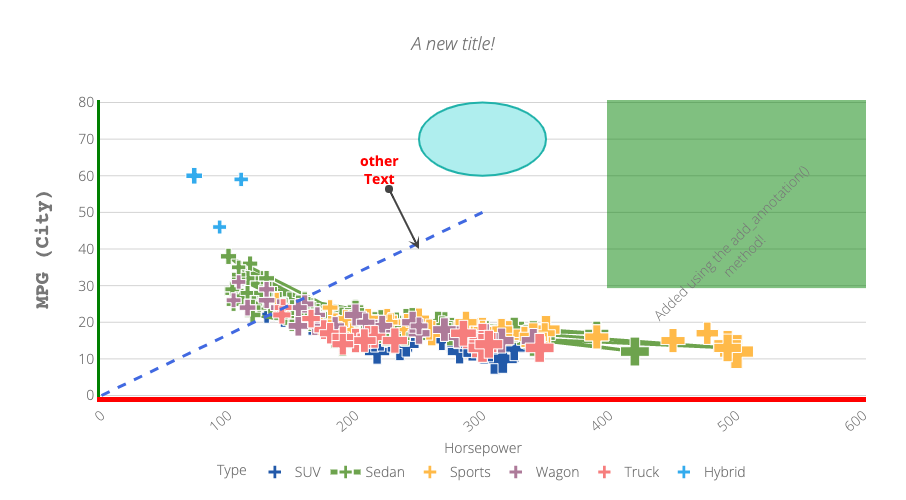

In [33]:
scatter.add_shape(type="circle",
                  xref="x",
                  yref="y",
                  fillcolor="PaleTurquoise",
                  x0=250,
                  y0=60,
                  x1=350,
                  y1=80,
                  line_color="LightSeaGreen"
                 )